In [9]:
 '''Chapter DSGE'''


import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve


In [10]:
#exercise no. 5
gamma  = 2.5
beta = 0.98 '''discounting factor'''
alpha = 0.40
delta = 0.10 '''capital depreciation'''
z_bar = 0
tau = 0.05

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T):
    c = (1-tau)*(w + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k):
    A = get_A(z_bar, alpha)
    r = alpha*A*k**(alpha-1)
    return r

def get_w(alpha, z_bar, k):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*k
    return w

def get_T(tau, w, r, delta, k):
    T = tau*(w + (r-delta)*k)
    return T

def euler(k, *args):
    (alpha, z_bar, tau, delta, gamma, beta) = args
    r = get_r(alpha, z_bar, k)
    w = get_w(alpha, z_bar, k)
    T = get_T(tau, w, r, delta, k)
    c = get_c(tau, w, r, delta, k, T)
    errors = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    return errors

def get_Y(A,K,alpha):
    Y = A*K**alpha
    return Y
    
k_init = 0.7
eul_args = (alpha, z_bar, tau, delta, gamma, beta)
results = opt.root(euler, k_init, args= (eul_args), tol = 1e-14)
k_ss = results.x
error = results.fun
A = get_A(z_bar, alpha)
Y = get_Y(A, k_ss, alpha)
r = get_r(alpha, z_bar, k_ss)
w = get_w(alpha, z_bar, k_ss)
T = get_T(tau, w, r, delta, k_ss)
c = get_c(tau, w, r, delta, k_ss, T)
print('A: ', A,'GDP: ', Y,'Interest rate: ',r, 'Wage rate: ', w,'Tax Revenue: ', T, 'Consumption: ', c)




A:  1.0 GDP:  [2.21325461] Interest rate:  [0.12148228] Wage rate:  [4.37249877] Tax Revenue:  [0.22645254] Consumption:  [4.52905082]
A:  1.0 GDP:  [2.21325461] Interest rate:  [0.12148228] Wage rate:  [4.37249877] Tax Revenue:  [0.22645254] Consumption:  [4.52905082]
A:  1.0 GDP:  [2.21325461] Interest rate:  [0.12148228] Wage rate:  [4.37249877] Tax Revenue:  [0.22645254] Consumption:  [4.52905082]


In [17]:
#exercize no. 6
gamma  = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05
a = 0.5

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T, l):
    c = (1-tau)*(w*l + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    r = alpha*A*(l/k)**(1-alpha)
    return r

def get_w(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*(k/l)**alpha
    return w

def get_T(tau, w, r, delta, k, l):
    T = tau*(w*l + (r-delta)*k)
    return T

def euler(klvec, *args):
    (alpha, z_bar, tau, delta, gamma, beta, a, zeta) = args
    k = klvec[0]
    l = klvec[1]
    r = get_r(alpha, z_bar, k,l)
    w = get_w(alpha, z_bar, k,l)
    T = get_T(tau, w, r, delta, k,l)
    c = get_c(tau, w, r, delta, k, T,l)
    error1 = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    error2 = c**(-gamma)*w*(1-tau)- a*(1-l)**(-zeta)  
    errors = np.array([error1, error2])
    return errors

def get_Y(alpha, z_bar, k,l):
    A = get_A(z_bar,alpha)
    Y = A*(k**alpha)*l**(1-alpha)
    return Y

klvec_init = np.array([0.5,0.5])
eul_args = (alpha, z_bar, tau, delta, gamma, beta, a, zeta)
results = opt.root(euler, klvec_init, args= (eul_args), tol = 1e-14)
klvec_ss = results.x
errors = results.fun
k_ss = klvec_ss[0]
l_ss = klvec_ss[1]
Y = get_Y(alpha, z_bar, k_ss, l_ss)
r = get_r(alpha, z_bar, k_ss, l_ss)
w = get_w(alpha, z_bar, k_ss, l_ss)
T = get_T(tau, w, r, delta, k_ss, l_ss)
C = get_c(tau, w, r, delta, k_ss, T, l_ss)
print('Steady State capital:', k_ss, 'Steady State Labour: ',l_ss,'GDP: ', Y,'Steady State Interest Rate:', r,
      'Steady State Wage: ', w, 'Steady State Tax Revenue: ', T, 'Steady State consumption: ',C)



Steady State capital: 4.225229026783866 Steady State Labour:  0.5797914531670062 GDP:  1.2832261088325871 Steady State Interest Rate: 0.1214822771213749 Steady State Wage:  1.3279527683513055 Steady State Tax Revenue:  0.04303516030771001 Steady State consumption:  0.8607032061542003
Steady State capital: 4.225229026783866 Steady State Labour:  0.5797914531670062 GDP:  1.2832261088325871 Steady State Interest Rate: 0.1214822771213749 Steady State Wage:  1.3279527683513055 Steady State Tax Revenue:  0.04303516030771001 Steady State consumption:  0.8607032061542003
Steady State capital: 4.225229026783866 Steady State Labour:  0.5797914531670062 GDP:  1.2832261088325871 Steady State Interest Rate: 0.1214822771213749 Steady State Wage:  1.3279527683513055 Steady State Tax Revenue:  0.04303516030771001 Steady State consumption:  0.8607032061542003


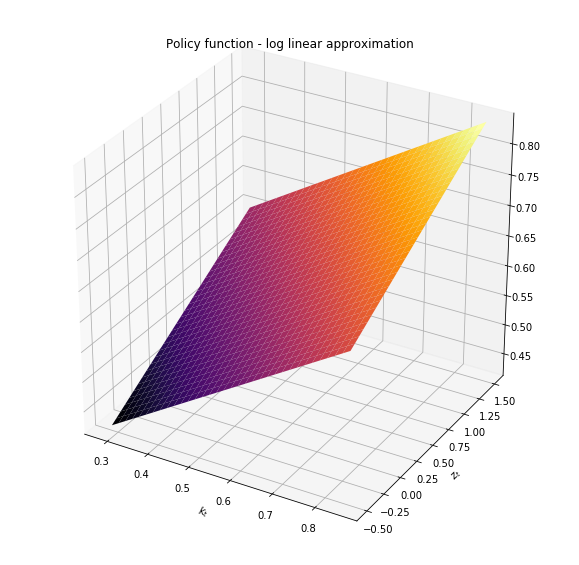

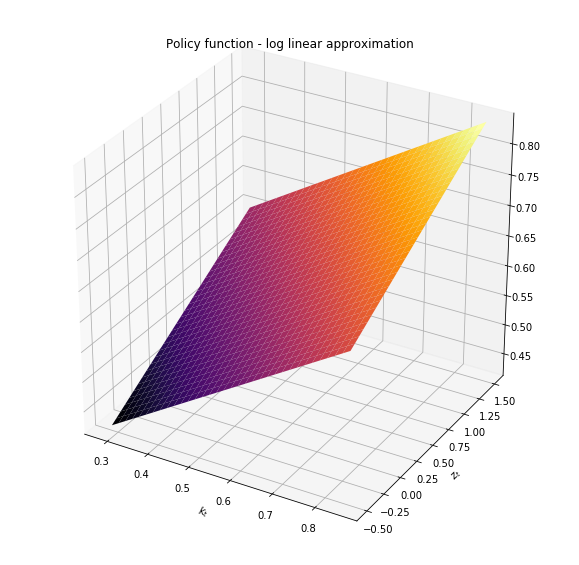

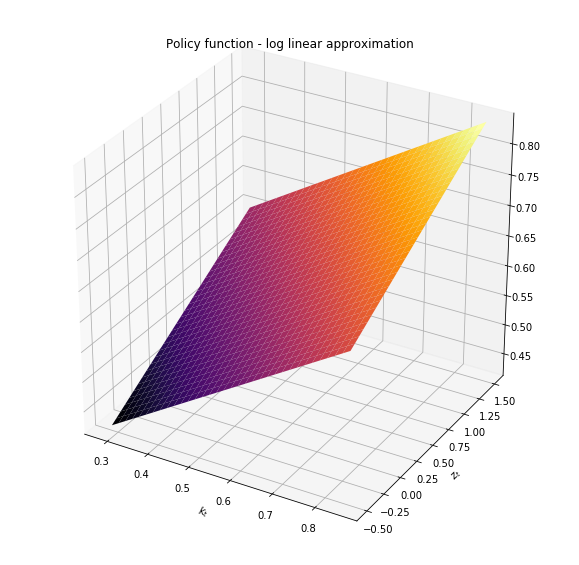

In [12]:

# Chapter 2 - Linearization

# Exercise No. 1
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    k_bar = A**(1/1-alpha)
    F = 1/((k_bar**alpha-1)-1)
    G = (alpha + k_bar)/(k_bar - k_bar**alpha)
    H = alpha/(1-k_bar**(1-alpha))
    L = k_bar/(k_bar - k_bar**alpha)
    M = 1/(1-k_bar**(1-alpha))
    N = rho
    return F,G,H,L,M,N

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
k_bar = A**(1/1-alpha)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('$z_t$')
plt.xlabel('$k_t$')
plt.show()
        
    







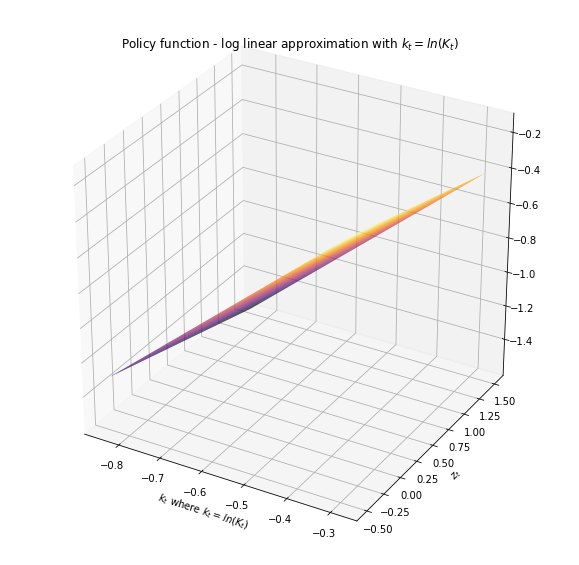

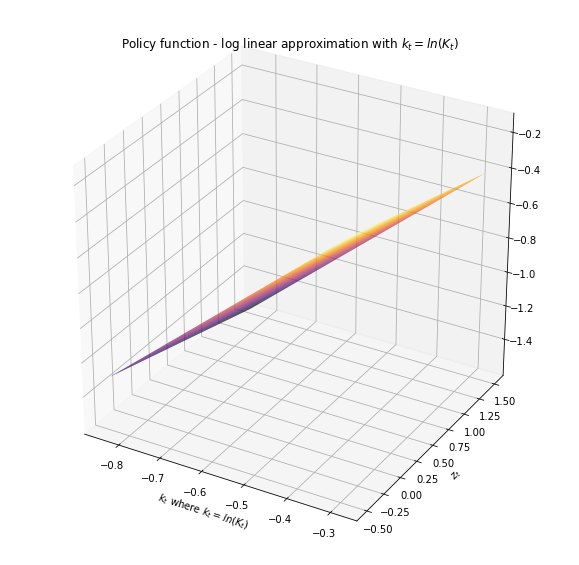

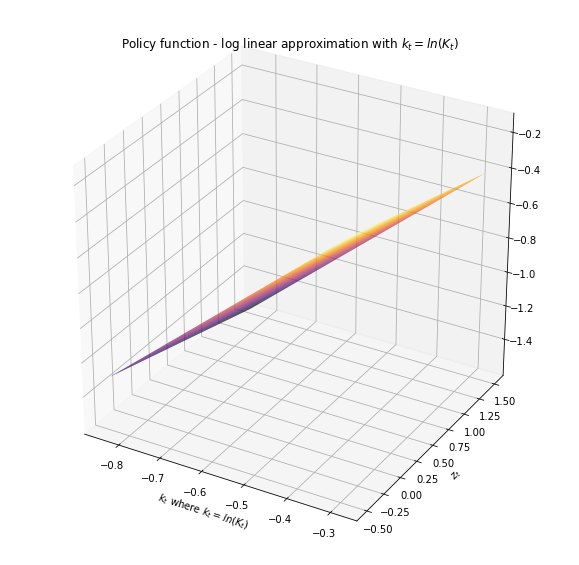

In [13]:
#Exercise No. 2
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    K_bar = A**(1/1-alpha)
    k_bar = np.log(K_bar)
    F = k_bar/(np.exp(alpha*k_bar)- np.exp(k_bar))
    G = k_bar*(alpha + np.exp((alpha-1)*k_bar))/(1- np.exp((alpha-1)*k_bar))
    H = (k_bar*alpha*np.exp(alpha*k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    L = -(np.exp(k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    M = (np.exp(alpha*k_bar))/(np.exp(alpha*k_bar)- np.exp(k_bar))
    N = rho
    return F,G,H,L,M,N 

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
K_bar = A**(1/1-alpha)
k_bar = np.log(K_bar)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation with $k_t = ln(K_t)$')
plt.ylabel('$z_t$')
plt.xlabel('$k_t$ where $k_t = ln(K_t)$')
plt.show()


In [14]:
# Exercise No. 5
gamma  = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05
a = 0.5

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T, l):
    c = (1-tau)*(w*l + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    r = alpha*A*(l/k)**(1-alpha)
    return r

def get_w(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*(k/l)**alpha
    return w

def get_T(tau, w, r, delta, k, l):
    T = tau*(w*l + (r-delta)*k)
    return T

def euler(klvec, *args):
    (alpha, z_bar, tau, delta, gamma, beta, a, zeta) = args
    k = klvec[0]
    l = klvec[1]
    r = get_r(alpha, z_bar, k,l)
    w = get_w(alpha, z_bar, k,l)
    T = get_T(tau, w, r, delta, k,l)
    c = get_c(tau, w, r, delta, k, T,l)
    error1 = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    error2 = c**(-gamma)*w*(1-tau)- a*(1-l)**(-zeta)  
    errors = np.array([error1, error2])
    return errors

def get_Y(alpha, z_bar, k,l):
    A = get_A(z_bar,alpha)
    Y = A*(k**alpha)*l**(1-alpha)
    return Y

def get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta):
    klvec_init = np.array([0.5,0.5])
    eul_args = (alpha, z_bar, tau, delta, gamma, beta, a, zeta)
    results = opt.root(euler, klvec_init, args= (eul_args), tol = 1e-14)
    klvec_ss = results.x
    errors = results.fun
    k_ss = klvec_ss[0]
    l_ss = klvec_ss[1]
    Y = get_Y(alpha, z_bar, k_ss, l_ss)
    r = get_r(alpha, z_bar, k_ss, l_ss)
    w = get_w(alpha, z_bar, k_ss, l_ss)
    T = get_T(tau, w, r, delta, k_ss, l_ss)
    C = get_c(tau, w, r, delta, k_ss, T, l_ss)
    I = delta*k_ss
    return k_ss, C, r, w, l_ss, T, Y, I

derivative = np.empty((8, 8))
epsilon = 1e-4

#Set slightly perturbed parameters
gamma_p  = gamma+epsilon
zeta_p = zeta + epsilon
beta_p = beta + epsilon
alpha_p = alpha + epsilon
delta_p = delta + epsilon
z_bar_p = z_bar + epsilon
tau_p = tau + epsilon
a_p = a + epsilon

# Start filling the matrix with perturbed steady states
derivative[0,:] = get_ss(alpha, z_bar, tau, delta_p, gamma, beta, a, zeta)
derivative[1,:] = get_ss(alpha, z_bar, tau_p, delta, gamma, beta, a, zeta)
derivative[2,:] = get_ss(alpha, z_bar_p, tau, delta, gamma, beta, a, zeta)
derivative[3,:] = get_ss(alpha_p, z_bar, tau, delta, gamma, beta, a, zeta)
derivative[4,:] = get_ss(alpha, z_bar, tau, delta, gamma_p, beta, a, zeta)
derivative[5,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta_p)
derivative[6,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta_p, a, zeta)
derivative[7,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a_p, zeta)

#create another matrix with original values of steady states i.e with original parameters
matrix = np.empty((8,8))
for i in range(8):
    matrix[i,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta)

#derivative is difference in steady state values/epsilon 
derivative = (derivative - matrix)/epsilon
derivative

array([[-4.83042378e+01, -3.50925032e+00,  1.00000000e+00,
        -7.28250259e+00,  1.31911929e+00, -1.75462516e-01,
        -4.11927550e+00, -6.10025176e-01],
       [-2.32335242e+00, -2.34406155e-01,  2.26153038e-02,
        -1.64806424e-01, -1.38930975e-01,  8.48959458e-01,
        -4.66741397e-01, -2.32335242e-01],
       [ 2.83835879e+00,  5.78189844e-01,  0.00000000e+00,
         1.32801917e+00, -1.90318105e-01,  2.89094922e-02,
         8.62025723e-01,  2.83835879e-01],
       [ 2.59941586e+01,  2.08592149e+00,  2.22044605e-12,
         4.39780036e+00, -7.69576204e-01,  1.04296074e-01,
         4.68533735e+00,  2.59941586e+00],
       [ 1.38696175e-01,  2.82532004e-02, -1.11022302e-12,
         6.66133815e-12,  1.90320705e-02,  1.41266002e-03,
         4.21228179e-02,  1.38696175e-02],
       [-8.01632142e-01, -1.63297031e-01,  2.77555756e-13,
         0.00000000e+00, -1.10001011e-01, -8.16485154e-03,
        -2.43460245e-01, -8.01632142e-02],
       [ 6.55108813e+01,  1.750679

array([[-4.83042378e+01, -3.50925032e+00,  1.00000000e+00,
        -7.28250259e+00,  1.31911929e+00, -1.75462516e-01,
        -4.11927550e+00, -6.10025176e-01],
       [-2.32335242e+00, -2.34406155e-01,  2.26153038e-02,
        -1.64806424e-01, -1.38930975e-01,  8.48959458e-01,
        -4.66741397e-01, -2.32335242e-01],
       [ 2.83835879e+00,  5.78189844e-01,  0.00000000e+00,
         1.32801917e+00, -1.90318105e-01,  2.89094922e-02,
         8.62025723e-01,  2.83835879e-01],
       [ 2.59941586e+01,  2.08592149e+00,  2.22044605e-12,
         4.39780036e+00, -7.69576204e-01,  1.04296074e-01,
         4.68533735e+00,  2.59941586e+00],
       [ 1.38696175e-01,  2.82532004e-02, -1.11022302e-12,
         6.66133815e-12,  1.90320705e-02,  1.41266002e-03,
         4.21228179e-02,  1.38696175e-02],
       [-8.01632142e-01, -1.63297031e-01,  2.77555756e-13,
         0.00000000e+00, -1.10001011e-01, -8.16485154e-03,
        -2.43460245e-01, -8.01632142e-02],
       [ 6.55108813e+01,  1.750679

array([[-4.83042378e+01, -3.50925032e+00,  1.00000000e+00,
        -7.28250259e+00,  1.31911929e+00, -1.75462516e-01,
        -4.11927550e+00, -6.10025176e-01],
       [-2.32335242e+00, -2.34406155e-01,  2.26153038e-02,
        -1.64806424e-01, -1.38930975e-01,  8.48959458e-01,
        -4.66741397e-01, -2.32335242e-01],
       [ 2.83835879e+00,  5.78189844e-01,  0.00000000e+00,
         1.32801917e+00, -1.90318105e-01,  2.89094922e-02,
         8.62025723e-01,  2.83835879e-01],
       [ 2.59941586e+01,  2.08592149e+00,  2.22044605e-12,
         4.39780036e+00, -7.69576204e-01,  1.04296074e-01,
         4.68533735e+00,  2.59941586e+00],
       [ 1.38696175e-01,  2.82532004e-02, -1.11022302e-12,
         6.66133815e-12,  1.90320705e-02,  1.41266002e-03,
         4.21228179e-02,  1.38696175e-02],
       [-8.01632142e-01, -1.63297031e-01,  2.77555756e-13,
         0.00000000e+00, -1.10001011e-01, -8.16485154e-03,
        -2.43460245e-01, -8.01632142e-02],
       [ 6.55108813e+01,  1.750679

In [15]:
#Exercise No. 6
params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)

def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1
    return ct, rt, Tt, wt

def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0
    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)
    return np.array([intertemporal_ee, intratemporal_ee])

def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))
    return sol.x

def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)

def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)
    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))
    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)
    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]
    return F, G, H, L, M

kbar, lbar = solve_ss(m)
cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)

F,G,H,L,M = linearize(m, kbar, lbar, eps=1e-6)
N = m.rho
AA=np.zeros((0,2))
BB=np.zeros((0,2))
CC=np.zeros((0,0))
DD=np.zeros((0,1))
FF=F
GG=G
HH=H
JJ=np.zeros((2,0))
KK=np.zeros((2,0))
LL = L.reshape((2,1))
MM = M.reshape((2,1))
WW=np.zeros((0,0)) #empty list or floating point
TT=np.array([1e-8, 1e-8])
NN=0.9
Zbar=np.array([0])
Sylv = 0

#Use given module to solve for Uhlig matrices
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP, PP.shape, type(PP))
print ('QQ', QQ, QQ.shape, type(QQ))
print ('RR:',RR)
print ('SS', SS)




PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]] (2, 2) <class 'numpy.ndarray'>
QQ [[ 0.54504859]
 [-0.00655467]] (2, 1) <class 'numpy.ndarray'>
RR: []
SS []
PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]] (2, 2) <class 'numpy.ndarray'>
QQ [[ 0.54504859]
 [-0.00655467]] (2, 1) <class 'numpy.ndarray'>
RR: []
SS []
PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]] (2, 2) <class 'numpy.ndarray'>
QQ [[ 0.54504859]
 [-0.00655467]] (2, 1) <class 'numpy.ndarray'>
RR: []
SS []


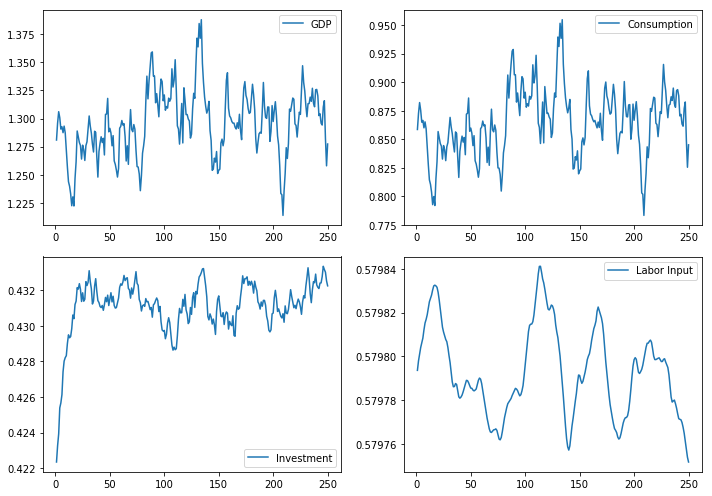

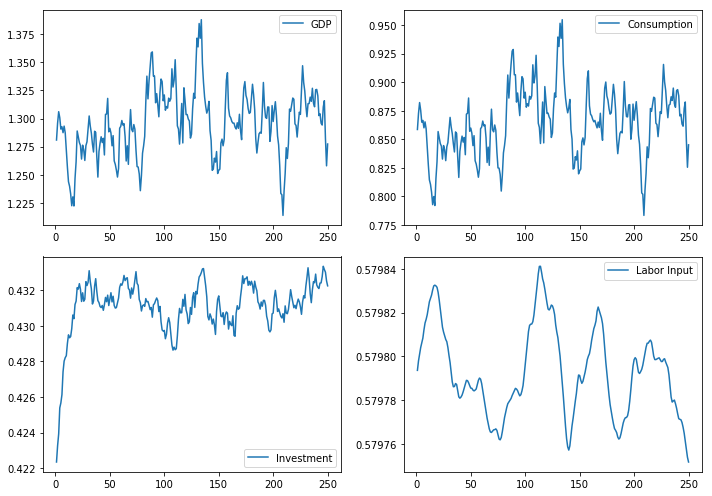

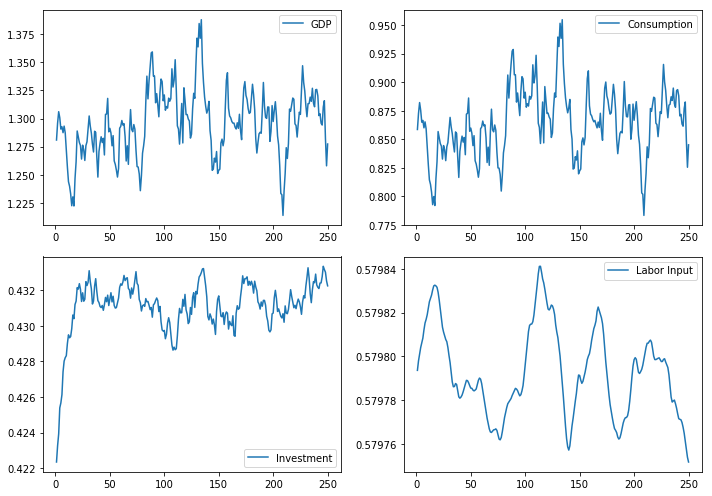

In [18]:
# Exercise No.7
#We take the values of P and Q from the previous problem and proceed.
T =250
simsize=10000
sigma = np.sqrt(0.0004)
z_bar=0

def policy_func(T):
    K_tilde_path = np.empty(T+1) #
    L_tilde_path = np.empty(T+1) #
    K_init = 0
    L_init = 0
    Z_init = 0
    Z_path = np.empty(T+1) #
    for i in range(T+1): #
        Z_path[i] = m.rho*Z_init + sigma*np.random.randn(1)
        Z_init = Z_path[i]
    Q1 = QQ[0]
    Q2 = QQ[1]
    Z1 = Q1*Z_path
    Z2 = Q2*Z_path
    X = np.array([K_init, L_init])
    for i in range(T+1): #
        K_tilde_path[i] = (PP@X)[0] + Z1[i] 
        L_tilde_path[i] = (PP@X)[1] + Z2[i]
        X = np.array([K_tilde_path[i], L_tilde_path[i]])
    return K_tilde_path, L_tilde_path, Z_path
        
def simatrix(T, simsize, kbar, lbar):
    simatrix_K = np.empty((simsize,T+1)) #
    simatrix_L = np.empty((simsize,T+1)) #
    for i in range(simsize):
        policy_func_output = policy_func(T)
        simatrix_K[i,:], simatrix_L[i,:] = policy_func_output[0], policy_func_output[1]
    simatrix_K = kbar*(np.exp(simatrix_K)) #Because equation of motion is given in terms of tilde so we need to convert it back to K
    simatrix_L = lbar*(np.exp(simatrix_L))
    return simatrix_K, simatrix_L, policy_func_output[2]

def averages(T, simsize, kbar, lbar,m):
    simatrix_output = simatrix(T, simsize, kbar, lbar)
    Z_path = simatrix_output[2][:-1]#
    simatrix_K, simatrix_L = simatrix_output[0], simatrix_output[1]
    avg_K_long = np.mean(simatrix_K, axis=0)
    avg_K = avg_K_long[:-1] #
    avg_L = np.mean(simatrix_L, axis=0)[:-1] #
    avg_GDP = f(m, avg_K, avg_L, Z_path)
    avg_Kp1 = avg_K_long[1:] #
    avg_C, avg_r, avg_T, avg_w = Definitions(m, avg_Kp1, avg_K, avg_L, Z_path)
    avg_I = avg_Kp1 - (1- m.delta)*avg_K
    return avg_GDP, avg_C, avg_I, avg_L

kbar, lbar = solve_ss(m)
cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)
avg_GDP, avg_C, avg_I, avg_L = averages(T, simsize, kbar,lbar,m)
time = np.linspace(1,250,250)

plt.figure(figsize=(10, 7))
plt.subplot(221)
plt.plot(time, avg_GDP, label = 'GDP')
plt.legend()

plt.subplot(222)
plt.plot(time, avg_C, label = 'Consumption')
plt.legend()

plt.subplot(223)
plt.plot(time, avg_I, label = 'Investment')
plt.legend()

plt.subplot(224)
plt.plot(time, avg_L, label = 'Labor Input')
plt.legend()

plt.tight_layout()
plt.show()



        
    


    





